In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
classifier = Sequential()
classifier.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation = 'relu'))
classifier.add(Conv2D(32, (3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [3]:
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [4]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset/training_set'

In [7]:
 import os
print(os.getcwd())


C:\Users\nisarg\Deep Learning


In [8]:
print(os.listdir())

['.ipynb_checkpoints', 'Deep Learning Coursework New-Copy1.ipynb', 'DL Object detection project-Copy1.ipynb', 'DNN Functional API-Copy1.ipynb', 'Untitled.ipynb']


In [9]:
import os

matches = []
for root, dirs, files in os.walk(r"C:\Users\nisarg"):
    if "dataset" in dirs:
        matches.append(os.path.join(root, "dataset"))

matches[:10], len(matches)


(['C:\\Users\\nisarg\\Documents\\GitHub\\tf-models\\research\\vid2depth\\dataset'],
 1)

In [10]:
import os

base = r"C:\Users\nisarg\Documents\GitHub\tf-models\research\vid2depth\dataset"
print("Exists base?", os.path.exists(base))
print("Inside base:", os.listdir(base)[:30])


Exists base? True
Inside base: ['dataset_loader.py', 'gen_data.py', 'kitti', '__init__.py']


In [11]:
import os

hits = []
for root, dirs, files in os.walk(r"C:\Users\nisarg"):
    if "training_set" in dirs:
        hits.append(os.path.join(root, "training_set"))

hits[:20], len(hits)


([], 0)

In [12]:
import os

targets = {"cats", "dogs", "cat", "dog", "PetImages", "petimages"}
found = []

for root, dirs, files in os.walk(r"C:\Users\nisarg"):
    for d in dirs:
        if d in targets:
            found.append(os.path.join(root, d))

found[:30], len(found)


(['C:\\Users\\nisarg\\AppData\\Roaming\\nltk_data\\corpora\\omw\\cat'], 1)

In [13]:
import os

image_ext = (".jpg", ".jpeg", ".png")
candidates = []

for root, dirs, files in os.walk(r"C:\Users\nisarg"):
    img_count = sum(1 for f in files if f.lower().endswith(image_ext))
    if img_count >= 20:   # threshold: folder has at least 20 images
        candidates.append((img_count, root))

# show top 20 folders with most images
candidates_sorted = sorted(candidates, key=lambda x: x[0], reverse=True)
candidates_sorted[:20]


[(3559, 'C:\\Users\\nisarg\\AppData\\Roaming\\Zoom\\data\\Emojis'),
 (3121,
  'C:\\Users\\nisarg\\AppData\\Local\\Packages\\AppleInc.iCloud_nzyj5cx40ttqa\\LocalCache\\Local\\Apple Inc\\iCloudPhotoLibrary\\ThumbsLow'),
 (1436, 'C:\\Users\\nisarg\\Pictures\\iCloud Photos\\Photos'),
 (960, 'C:\\Users\\nisarg\\Desktop\\Nila\\Whatsapp img'),
 (597,
  'C:\\Users\\nisarg\\AppData\\Local\\Microsoft\\Windows\\Notifications\\wpnidm'),
 (541, 'C:\\Users\\nisarg\\Pictures\\Screenshots'),
 (215,
  'C:\\Users\\nisarg\\AppData\\Local\\Packages\\AD2F1837.myHP_v10z8vjag6ke6\\LocalCache\\Roaming\\HP Inc\\HP Accessory Center\\icons'),
 (166,
  'C:\\Users\\nisarg\\AppData\\Local\\Microsoft\\Office\\SolutionPackages\\c59a3877e92d94ccf9dbb1adb28dcf82\\PackageResources\\assets\\src\\assets\\images'),
 (114,
  'C:\\Users\\nisarg\\anaconda3\\Library\\qml\\QtQuick\\Controls.2\\designer\\images'),
 (114,
  'C:\\Users\\nisarg\\anaconda3\\pkgs\\qt-5.9.7-vc14h73c81de_0\\Library\\qml\\QtQuick\\Controls.2\\designer\\

In [14]:
import os

downloads = r"C:\Users\nisarg\Downloads"
print("Downloads exists?", os.path.exists(downloads))

items = os.listdir(downloads)
# show only items that look like datasets (zip folders etc.)
suspicious = [x for x in items if any(k in x.lower() for k in ["cat", "dog", "dataset", "train", "kaggle", "cnn", "deep", "image"])]
print("Suspicious items:", suspicious)


Downloads exists? True
Suspicious items: ['180470109019_CompletionCertificate.docx', '180470109019_CompletionCertificate.pdf', 'Certificate of Completion.pdf', 'convocation_print.pdf', 'Degree Certificate Nisarg Joshi.pdf', 'DT20222330938_Application.pdf', 'Justification Letter.docx', 'Justification Letter.pdf', 'MAIN VISA APPLICATION FORM.pdf', 'Nisarg Joshi Degree Certificate + Transcript_page-0002.pdf']


In [15]:
import os

proj = r"C:\Users\nisarg\Deep Learning"
print("Project folder exists?", os.path.exists(proj))
print("Project folder contents:\n", os.listdir(proj))


Project folder exists? True
Project folder contents:
 ['.ipynb_checkpoints', 'Deep Learning Coursework New-Copy1.ipynb', 'DL Object detection project-Copy1.ipynb', 'DNN Functional API-Copy1.ipynb', 'Untitled.ipynb']


In [16]:
import os

base = r"C:\Users\nisarg\Deep Learning\dataset"
train_path = os.path.join(base, "training_set")
test_path  = os.path.join(base, "test_set")

# For a binary classifier, you'll need two class folders inside each set.
# We'll name them class1 and class2 for now; you can rename later (e.g., cats/dogs).
for p in [
    os.path.join(train_path, "class1"),
    os.path.join(train_path, "class2"),
    os.path.join(test_path, "class1"),
    os.path.join(test_path, "class2"),
]:
    os.makedirs(p, exist_ok=True)

print("Created:")
print(train_path)
print(test_path)
print("Training subfolders:", os.listdir(train_path))
print("Test subfolders:", os.listdir(test_path))


Created:
C:\Users\nisarg\Deep Learning\dataset\training_set
C:\Users\nisarg\Deep Learning\dataset\test_set
Training subfolders: ['class1', 'class2']
Test subfolders: ['class1', 'class2']


In [17]:
training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 0 images belonging to 2 classes.


In [18]:
import os

hits = []
for root, dirs, files in os.walk(r"C:\Users\nisarg"):
    if "test_set" in dirs:
        hits.append(os.path.join(root, "test_set"))

hits[:20], len(hits)


(['C:\\Users\\nisarg\\Deep Learning\\dataset\\test_set'], 1)

In [19]:
import os

def count_images(folder):
    exts = (".jpg", ".jpeg", ".png", ".bmp", ".gif", ".webp")
    return sum(1 for f in os.listdir(folder) if f.lower().endswith(exts))

folders = [
    r"C:\Users\nisarg\Deep Learning\dataset\training_set\class1",
    r"C:\Users\nisarg\Deep Learning\dataset\training_set\class2",
    r"C:\Users\nisarg\Deep Learning\dataset\test_set\class1",
    r"C:\Users\nisarg\Deep Learning\dataset\test_set\class2",
]

for f in folders:
    print(f, "->", count_images(f))


C:\Users\nisarg\Deep Learning\dataset\training_set\class1 -> 0
C:\Users\nisarg\Deep Learning\dataset\training_set\class2 -> 0
C:\Users\nisarg\Deep Learning\dataset\test_set\class1 -> 0
C:\Users\nisarg\Deep Learning\dataset\test_set\class2 -> 0


In [20]:
import os

src1 = r"C:\Users\nisarg\Desktop\Nila\Whatsapp img"
src2 = r"C:\Users\nisarg\Desktop\Nila\Photos 1"

print("src1 exists?", os.path.exists(src1), "| files:", len(os.listdir(src1)) if os.path.exists(src1) else "NA")
print("src2 exists?", os.path.exists(src2), "| files:", len(os.listdir(src2)) if os.path.exists(src2) else "NA")


src1 exists? True | files: 960
src2 exists? True | files: 44


In [21]:
import os, random, shutil

# Source folders (your two classes)
src1 = r"C:\Users\nisarg\Desktop\Nila\Whatsapp img"   # class1
src2 = r"C:\Users\nisarg\Desktop\Nila\Photos 1"      # class2

# Destination folders (your project dataset structure)
dst_train_1 = r"C:\Users\nisarg\Deep Learning\dataset\training_set\class1"
dst_train_2 = r"C:\Users\nisarg\Deep Learning\dataset\training_set\class2"
dst_test_1  = r"C:\Users\nisarg\Deep Learning\dataset\test_set\class1"
dst_test_2  = r"C:\Users\nisarg\Deep Learning\dataset\test_set\class2"

exts = (".jpg", ".jpeg", ".png", ".bmp", ".webp")

def list_images(folder):
    return [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith(exts)]

imgs1 = list_images(src1)
imgs2 = list_images(src2)

print("Images found:", len(imgs1), "in class1,", len(imgs2), "in class2")

# Balance: use only as many as the smaller class
n = min(len(imgs1), len(imgs2))
random.seed(42)
random.shuffle(imgs1)
random.shuffle(imgs2)
imgs1 = imgs1[:n]
imgs2 = imgs2[:n]

split = int(0.8 * n)

train1, test1 = imgs1[:split], imgs1[split:]
train2, test2 = imgs2[:split], imgs2[split:]

def copy_batch(files, dest):
    os.makedirs(dest, exist_ok=True)
    copied = 0
    for fp in files:
        name = os.path.basename(fp)
        out = os.path.join(dest, name)
        # Avoid overwriting if duplicate names exist
        if os.path.exists(out):
            base, ext = os.path.splitext(name)
            out = os.path.join(dest, f"{base}_{random.randint(10000,99999)}{ext}")
        shutil.copy2(fp, out)
        copied += 1
    return copied

c1 = copy_batch(train1, dst_train_1)
c2 = copy_batch(train2, dst_train_2)
c3 = copy_batch(test1,  dst_test_1)
c4 = copy_batch(test2,  dst_test_2)

print("Copied counts:")
print("train class1:", c1)
print("train class2:", c2)
print("test  class1:", c3)
print("test  class2:", c4)


Images found: 960 in class1, 44 in class2
Copied counts:
train class1: 35
train class2: 35
test  class1: 9
test  class2: 9


In [22]:
training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 70 images belonging to 2 classes.


In [24]:
test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


NameError: name 'test_datagen' is not defined

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)


In [26]:
test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 18 images belonging to 2 classes.


In [27]:
print("Training class indices:", training_set.class_indices)
print("Test class indices:", test_set.class_indices)


Training class indices: {'class1': 0, 'class2': 1}
Test class indices: {'class1': 0, 'class2': 1}


In [28]:
x_batch, y_batch = next(training_set)

print("x_batch shape:", x_batch.shape)   # should be (batch_size, 64, 64, 3)
print("y_batch shape:", y_batch.shape)   # should be (batch_size,)
print("First 10 labels:", y_batch[:10])
print("Min/Max pixel values:", x_batch.min(), x_batch.max())


x_batch shape: (32, 64, 64, 3)
y_batch shape: (32,)
First 10 labels: [0. 1. 1. 0. 0. 1. 1. 1. 0. 0.]
Min/Max pixel values: 0.0 1.0


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [30]:
training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 70 images belonging to 2 classes.


In [31]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# If your model is already defined above, keep it.
# If not, this is a standard small CNN:
classifier = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = classifier.fit(
    training_set,
    validation_data=test_set,
    epochs=30,
    callbacks=[early_stop]
)


Epoch 1/30
3/3 [==============================] - 7s 3s/step - loss: 1.1735 - accuracy: 0.5000 - val_loss: 0.9204 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 6s 2s/step - loss: 0.8191 - accuracy: 0.5000 - val_loss: 0.6727 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 0.6805 - accuracy: 0.5000 - val_loss: 0.6713 - val_accuracy: 0.6111
Epoch 4/30
3/3 [==============================] - 6s 2s/step - loss: 0.6775 - accuracy: 0.6286 - val_loss: 0.6621 - val_accuracy: 0.7222
Epoch 5/30
3/3 [==============================] - 6s 3s/step - loss: 0.6766 - accuracy: 0.5000 - val_loss: 0.6501 - val_accuracy: 0.6111
Epoch 6/30
3/3 [==============================] - 6s 2s/step - loss: 0.6605 - accuracy: 0.6000 - val_loss: 0.6303 - val_accuracy: 0.6111
Epoch 7/30
3/3 [==============================] - 5s 1s/step - loss: 0.6242 - accuracy: 0.8000 - val_loss: 0.6158 - val_accuracy: 0.6111
Epoch 8/30
3/3 [=========================

In [32]:
import os

test_dir = r"C:\Users\nisarg\Deep Learning\dataset\test_set"

# Grab 1 image from class1 and class2 so we can test both
class1_files = os.listdir(os.path.join(test_dir, "class1"))
class2_files = os.listdir(os.path.join(test_dir, "class2"))

img1 = os.path.join(test_dir, "class1", class1_files[0])
img2 = os.path.join(test_dir, "class2", class2_files[0])

print("Sample from class1:", img1)
print("Sample from class2:", img2)


Sample from class1: C:\Users\nisarg\Deep Learning\dataset\test_set\class1\IMG-20191201-WA0002.jpg
Sample from class2: C:\Users\nisarg\Deep Learning\dataset\test_set\class2\20191221_153116.jpg


In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_one(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # match rescale

    p = float(classifier.predict(x, verbose=0)[0][0])  # sigmoid prob for class2 (label 1)
    pred_label = 1 if p >= 0.5 else 0

    # reverse-map label -> class name
    inv_map = {v: k for k, v in training_set.class_indices.items()}
    pred_class = inv_map[pred_label]

    print("Image:", img_path)
    print("Predicted probability of class2 (label=1):", round(p, 4))
    print("Predicted class:", pred_class)
    print("-" * 60)

predict_one(r"C:\Users\nisarg\Deep Learning\dataset\test_set\class1\IMG-20191201-WA0002.jpg")
predict_one(r"C:\Users\nisarg\Deep Learning\dataset\test_set\class2\20191221_153116.jpg")


Image: C:\Users\nisarg\Deep Learning\dataset\test_set\class1\IMG-20191201-WA0002.jpg
Predicted probability of class2 (label=1): 0.2673
Predicted class: class1
------------------------------------------------------------
Image: C:\Users\nisarg\Deep Learning\dataset\test_set\class2\20191221_153116.jpg
Predicted probability of class2 (label=1): 0.8751
Predicted class: class2
------------------------------------------------------------


In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get true labels from the generator
y_true = test_set.classes  # 0/1 labels in directory order

# Predict probabilities for all test images
test_set.reset()  # important so predictions align
y_prob = classifier.predict(test_set, verbose=0).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
print("\nConfusion Matrix (rows=true, cols=pred):\n", confusion_matrix(y_true, y_pred))

print("\nClassification Report:\n", classification_report(
    y_true, y_pred,
    target_names=list(test_set.class_indices.keys())
))


Accuracy: 0.5

Confusion Matrix (rows=true, cols=pred):
 [[5 4]
 [5 4]]

Classification Report:
               precision    recall  f1-score   support

      class1       0.50      0.56      0.53         9
      class2       0.50      0.44      0.47         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.50        18
weighted avg       0.50      0.50      0.50        18



In [35]:
classifier.save("my_cnn_model.h5")
print("Model saved.")


Model saved.


In [36]:
from tensorflow.keras.models import load_model
model = load_model("my_cnn_model.h5")


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 18 images belonging to 2 classes.


In [38]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000)

C:\Users\nisarg\AppData\Local\Temp/ipykernel_13456/2454226906.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/25
8000/8000 [==============================] - 7s 521us/step - loss: 0.4298 - accuracy: 0.8857 - val_loss: 0.5769 - val_accuracy: 0.7778


In [39]:
import math

train_steps = math.ceil(training_set.samples / training_set.batch_size)
val_steps   = math.ceil(test_set.samples / test_set.batch_size)

print("training samples:", training_set.samples)
print("batch size:", training_set.batch_size)
print("steps_per_epoch should be:", train_steps)

print("validation samples:", test_set.samples)
print("validation batch size:", test_set.batch_size)
print("validation_steps should be:", val_steps)


training samples: 70
batch size: 32
steps_per_epoch should be: 3
validation samples: 18
validation batch size: 32
validation_steps should be: 1


In [40]:
history = classifier.fit(
    training_set,
    steps_per_epoch=train_steps,
    epochs=25,
    validation_data=test_set,
    validation_steps=val_steps
)


Epoch 1/25
3/3 [==============================] - 5s 3s/step - loss: 0.4593 - accuracy: 0.8000 - val_loss: 0.5578 - val_accuracy: 0.7222
Epoch 2/25
3/3 [==============================] - 5s 1s/step - loss: 0.4523 - accuracy: 0.8000 - val_loss: 0.6925 - val_accuracy: 0.6111
Epoch 3/25
3/3 [==============================] - 5s 1s/step - loss: 0.3781 - accuracy: 0.8000 - val_loss: 0.5372 - val_accuracy: 0.6667
Epoch 4/25
3/3 [==============================] - 5s 2s/step - loss: 0.3748 - accuracy: 0.8286 - val_loss: 0.6230 - val_accuracy: 0.6667
Epoch 5/25
3/3 [==============================] - 5s 2s/step - loss: 0.4918 - accuracy: 0.7857 - val_loss: 0.7127 - val_accuracy: 0.6667
Epoch 6/25
3/3 [==============================] - 5s 2s/step - loss: 0.3601 - accuracy: 0.8571 - val_loss: 0.6993 - val_accuracy: 0.7222
Epoch 7/25
3/3 [==============================] - 5s 2s/step - loss: 0.4022 - accuracy: 0.8000 - val_loss: 0.6734 - val_accuracy: 0.6667
Epoch 8/25
3/3 [=========================

In [41]:
history = classifier.fit(
    training_set,
    epochs=25,
    validation_data=test_set
)


Epoch 1/25
3/3 [==============================] - 5s 2s/step - loss: 0.1028 - accuracy: 0.9857 - val_loss: 1.0190 - val_accuracy: 0.6111
Epoch 2/25
3/3 [==============================] - 5s 1s/step - loss: 0.0801 - accuracy: 0.9857 - val_loss: 1.2170 - val_accuracy: 0.6667
Epoch 3/25
3/3 [==============================] - 4s 2s/step - loss: 0.0919 - accuracy: 0.9857 - val_loss: 1.0961 - val_accuracy: 0.6111
Epoch 4/25
3/3 [==============================] - 4s 1s/step - loss: 0.0732 - accuracy: 1.0000 - val_loss: 1.0703 - val_accuracy: 0.6667
Epoch 5/25
3/3 [==============================] - 5s 2s/step - loss: 0.0742 - accuracy: 0.9857 - val_loss: 1.3731 - val_accuracy: 0.6111
Epoch 6/25
3/3 [==============================] - 5s 1s/step - loss: 0.0530 - accuracy: 0.9857 - val_loss: 1.3931 - val_accuracy: 0.5556
Epoch 7/25
3/3 [==============================] - 5s 1s/step - loss: 0.0671 - accuracy: 0.9714 - val_loss: 1.4269 - val_accuracy: 0.5000
Epoch 8/25
3/3 [=========================

In [42]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/single_prediction/cat_or_dog_1.jpg'

In [43]:
 import os

print(os.getcwd())
print("single_prediction folder exists?",
      os.path.exists(r"dataset\single_prediction"))


C:\Users\nisarg\Deep Learning
single_prediction folder exists? False


In [44]:
import os

path = r"dataset\single_prediction"
if os.path.exists(path):
    print("Files inside:", os.listdir(path))
else:
    print("Folder not found:", path)


Folder not found: dataset\single_prediction


In [45]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = r"C:\Users\nisarg\Deep Learning\dataset\test_set\class1\IMG-20191201-WA0002.jpg"

test_image = image.load_img(img_path, target_size=(64, 64))
test_image = image.img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)

p = float(classifier.predict(test_image, verbose=0)[0][0])
pred = "class2" if p >= 0.5 else "class1"

print("prob(class2) =", round(p, 4))
print("prediction =", pred)


prob(class2) = 0.9534
prediction = class2


In [46]:
import os

single_pred_dir = r"C:\Users\nisarg\Deep Learning\dataset\single_prediction"
os.makedirs(single_pred_dir, exist_ok=True)

print("Created?", os.path.exists(single_pred_dir))
print("Path:", single_pred_dir)


Created? True
Path: C:\Users\nisarg\Deep Learning\dataset\single_prediction


In [47]:
import shutil, os

src = r"C:\Users\nisarg\Deep Learning\dataset\test_set\class1\IMG-20191201-WA0002.jpg"
dst = r"C:\Users\nisarg\Deep Learning\dataset\single_prediction\cat_or_dog_1.jpg"

shutil.copy2(src, dst)

print("Copied file exists?", os.path.exists(dst))
print("Files now inside single_prediction:", os.listdir(r"C:\Users\nisarg\Deep Learning\dataset\single_prediction"))


Copied file exists? True
Files now inside single_prediction: ['cat_or_dog_1.jpg']


In [48]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)

result = float(classifier.predict(test_image, verbose=0)[0][0])

prediction = 'class2' if result >= 0.5 else 'class1'

print("prob(class2) =", round(result, 4))
print("prediction =", prediction)


prob(class2) = 0.9534
prediction = class2


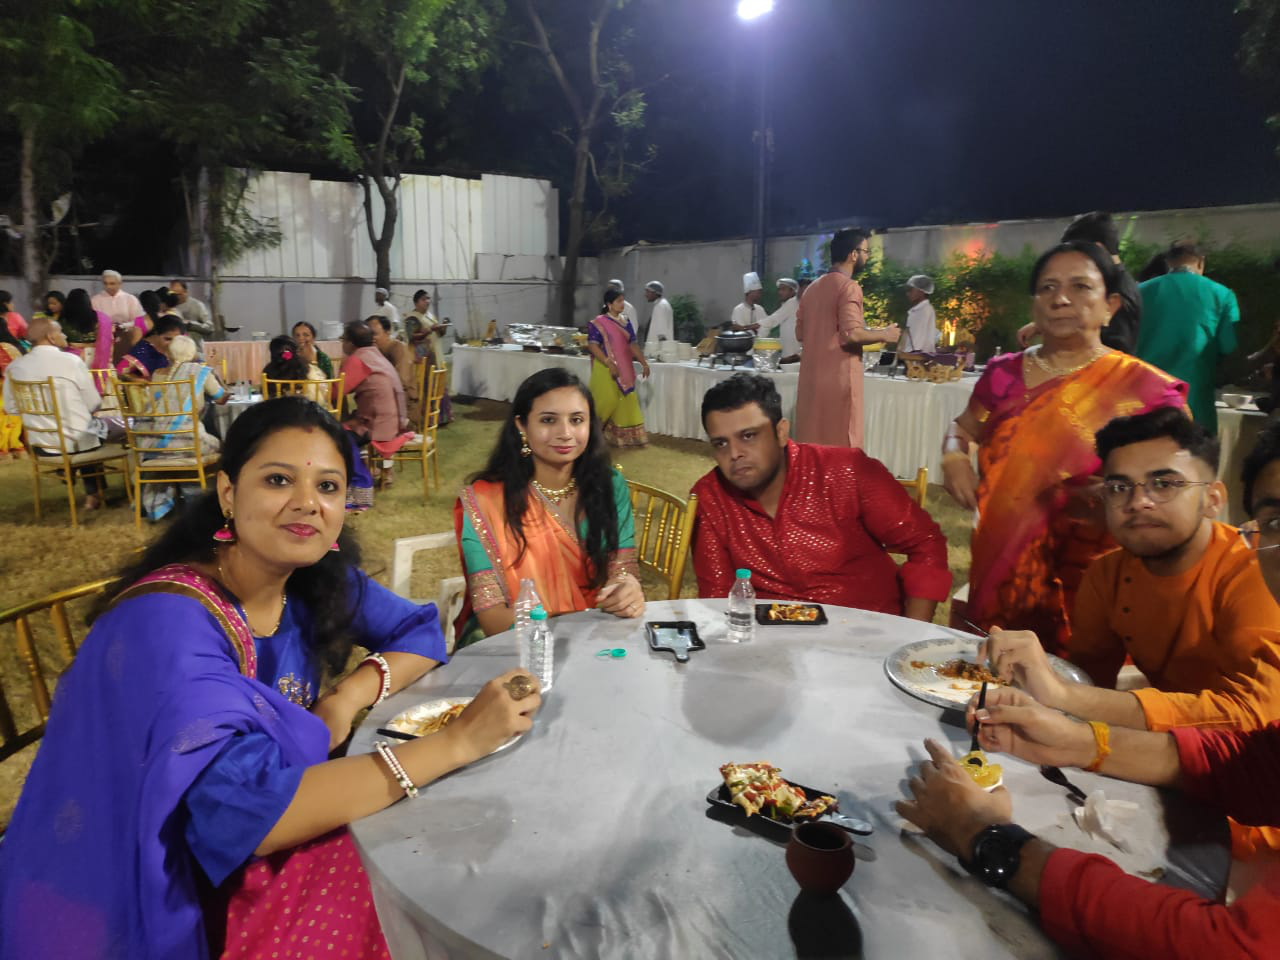

In [51]:
image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', ...)
